
 # Hands on II Assignment AIT 664(DL3)
   
   **Regression Models used for Prediction of House Prices in Chicago City**

   **Siddhant Mehta G01455730**




# Import necessary libraries

In [30]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


#Importing data

In [31]:
#Importing data
df = pd.read_csv('Chicago_housing.csv')

In [3]:
df.head()

,Price,Bedroom,Space,Room,Lot,Tax,Bathroom,Garage,Condition
0,53.0,2.0,967.0,5.0,39.0,652.0,1.5,0.0,0.0
1,55.0,2.0,815.0,5.0,33.0,1000.0,1.0,2.0,1.0
2,56.0,3.0,900.0,5.0,35.0,897.0,1.5,1.0,0.0
3,58.0,3.0,1007.0,6.0,24.0,964.0,1.5,2.0,0.0
4,64.0,3.0,1100.0,7.0,50.0,1099.0,1.5,1.5,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Price      156 non-null    float64
 1   Bedroom    156 non-null    float64
 2   Space      146 non-null    float64
 3   Room       156 non-null    float64
 4   Lot        146 non-null    float64
 5   Tax        147 non-null    float64
 6   Bathroom   156 non-null    float64
 7   Garage     156 non-null    float64
 8   Condition  156 non-null    float64
dtypes: float64(9)
memory usage: 11.2 KB


In [5]:
df.isnull().sum()

,0
Price,1
Bedroom,1
Space,11
Room,1
Lot,11
Tax,10
Bathroom,1
Garage,1
Condition,1


In [6]:
data = df.copy()
data.head(160)

,Price,Bedroom,Space,Room,Lot,Tax,Bathroom,Garage,Condition
0,53.0,2.0,967.0,5.0,39.0,652.0,1.5,0.0,0.0
1,55.0,2.0,815.0,5.0,33.0,1000.0,1.0,2.0,1.0
2,56.0,3.0,900.0,5.0,35.0,897.0,1.5,1.0,0.0
3,58.0,3.0,1007.0,6.0,24.0,964.0,1.5,2.0,0.0
4,64.0,3.0,1100.0,7.0,50.0,1099.0,1.5,1.5,0.0
...,...,...,...,...,...,...,...,...,...
152,44.0,3.0,820.0,5.0,27.0,NaN,1.0,0.0,1.0
153,43.0,2.0,593.0,4.0,30.0,465.0,2.0,1.0,0.0
154,53.0,3.0,716.0,6.0,30.0,585.0,1.0,2.0,1.0
155,62.0,4.0,951.0,7.0,30.0,895.0,2.0,1.0,0.0


In [7]:
data.isnull().sum()

,0
Price,1
Bedroom,1
Space,11
Room,1
Lot,11
Tax,10
Bathroom,1
Garage,1
Condition,1


In [8]:
data.drop(156)

,Price,Bedroom,Space,Room,Lot,Tax,Bathroom,Garage,Condition
0,53.0,2.0,967.0,5.0,39.0,652.0,1.5,0.0,0.0
1,55.0,2.0,815.0,5.0,33.0,1000.0,1.0,2.0,1.0
2,56.0,3.0,900.0,5.0,35.0,897.0,1.5,1.0,0.0
3,58.0,3.0,1007.0,6.0,24.0,964.0,1.5,2.0,0.0
4,64.0,3.0,1100.0,7.0,50.0,1099.0,1.5,1.5,0.0
...,...,...,...,...,...,...,...,...,...
151,42.0,3.0,585.0,5.0,50.0,713.0,1.0,0.0,0.0
152,44.0,3.0,820.0,5.0,27.0,NaN,1.0,0.0,1.0
153,43.0,2.0,593.0,4.0,30.0,465.0,2.0,1.0,0.0
154,53.0,3.0,716.0,6.0,30.0,585.0,1.0,2.0,1.0


# Now for the remaining null values in the datset let's fill them with the mean value

In [32]:
data.fillna(data.mean(), inplace=True)

In [10]:
# Check if there are still any null values
data.isnull().sum()


,0
Price,0
Bedroom,0
Space,0
Room,0
Lot,0
Tax,0
Bathroom,0
Garage,0
Condition,0


# Now Let's find the covariance with the target variable which is "price" to understand the relationship of it with the other variables present in dataframe.

In [33]:
price_corr = df.corr() ['Price']
price_corr_sorted = price_corr.sort_values(ascending=False)
price_corr_sorted

,Price
Price,1.000000
Space,0.724987
Room,0.578480
Garage,0.553105
Bathroom,0.538485
Tax,0.504016
Lot,0.445057
Bedroom,0.302451
Condition,0.079336


In [15]:
#Now since our Target variable is Price we have to drop it in order to do predictions.
x= data.drop('Price', axis = 1)
y = data['Price']
#split the train and Test
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 42)

#In this we are training and evaluating a Linear Regression model

**Model Initialization**:

LR_model = LinearRegression() creates an instance of the Linear Regression model.

**Model Training**:

The model is trained on the training dataset using LR_model.fit
(x_train, y_train).

**Prediction**:

Predictions for the test set are generated with y_predlm = LR_model.predict(x_test).

Model Evaluation**:

**Root Mean Squared Error (RMSE)**:

 The RMSE value is calculated as 68.03, indicating the average deviation of the predicted values from the actual values.

**R-squared (R²) Score**:

The R² value is approximately 0.57, meaning that about 57% of the variance in the dependent variable can be explained by the independent variables in the model. This indicates a moderate level of explanatory power, suggesting that the model captures some, but not all, of the variability in the data.

Overall, the evaluation metrics highlight that while the Linear Regression model provides a reasonable prediction capability, there is still a lot of improvement that needs to be done for this model and it doesn't give a better prediction.

In [16]:
# Building the Linear Regression Model
LR_model = LinearRegression()
LR_model.fit(x_train, y_train)
# prediction
y_predlm = LR_model.predict(x_test)
#Model Evaluation:
print('RMSE value for Linear Regression Model:', mean_squared_error(y_test,y_predlm))
print('Rsqaure value for Linear Regression Model:', r2_score(y_test,y_predlm))

RMSE value for Linear Regression Model: 68.03424620279092
Rsqaure value for Linear Regression Model: 0.5697710584497842


**Interpretation:**

While the fitted vs. actual plot shows a general trend of the model's predictions aligning with the actual values, there are some areas for improvement:

**Scatter:** The points are somewhat scattered around the ideal 45-degree line, indicating there is a degree of error in the predictions.

**Underestimation:** The model appears to consistently underestimate values, especially in the lower range.

**Outliers:** A few points deviate significantly from the general trend, suggesting potential outliers or areas where the model struggles.

Overall it suggest that the model needs improvement.

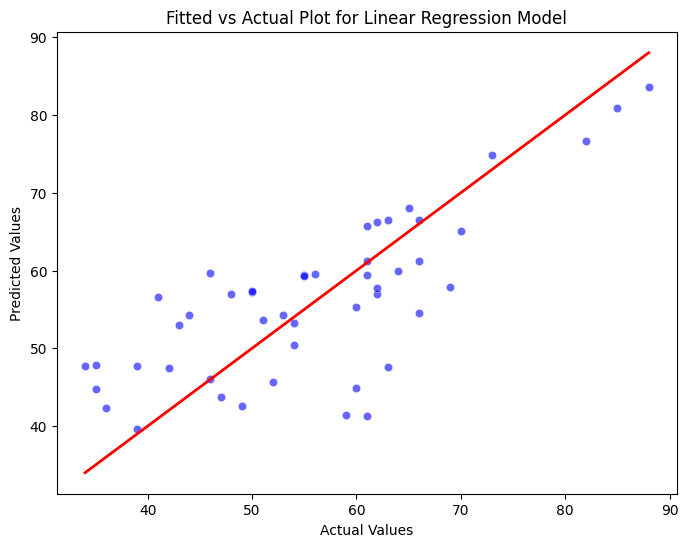

In [17]:
# Plotting the Fited vs Actual Plots
# Generate predictions
y_predlm = LR_model.predict(x_test)
# Create a scatter plot for fitted vs actual values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_predlm, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)

# Label the plot
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Fitted vs Actual Plot for Linear Regression Model")
plt.show()


# In this we are training and evaluating  a Random Forest model for regression tasks:

**Model Initialization:**

 RF_model = RandomForestRegressor(random_state=42) creates an instance of the Random Forest Regressor, setting a random state for reproducibility.

**Model Training:**

 The model is trained on the training dataset with RF_model.fit(x_train, y_train).

**Prediction:**

 Predictions are made for the test set using y_pred_rf = RF_model.predict(x_test).

**Model Evaluation:**

**Root Mean Squared Error (RMSE):**

The RMSE value is approximately 5.09, indicating that, on average, the predictions deviate from the actual values by about 5.09 units. A lower RMSE suggests a better fit of the model to the data, indicating okish predictive accuracy.

**R-squared (R²) Score:**

 The R² value is approximately 0.84, which means that around 84% of the variance in the target variable is explained by the independent variables in the model. This high R² value suggests that the Random Forest model effectively captures the underlying patterns in the data.

Overall, the evaluation metrics demonstrate that the Random Forest model provides strong predictive performance, with a low RMSE and a high R² score, indicating a robust fit to the data.

In [18]:
# Create and train the Random Forest model
RF_model = RandomForestRegressor(random_state=42)
RF_model.fit(x_train, y_train)

# Prediction
y_pred_rf = RF_model.predict(x_test)

# Model Evaluation
print('RMSE value for Random Forest Model:', mean_squared_error(y_test, y_pred_rf, squared=False))
print('R-squared value for Random Forest Model:', r2_score(y_test, y_pred_rf))

RMSE value for Random Forest Model: 5.08768302228996
R-squared value for Random Forest Model: 0.8363137738193805


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


**In this actual vs Fitted plots we can see that most of the data points follow the pattern but at the same time we see many outliers lying far as well. But overall this shows that the Random Forest model is slightly better when it comes to prediction.**

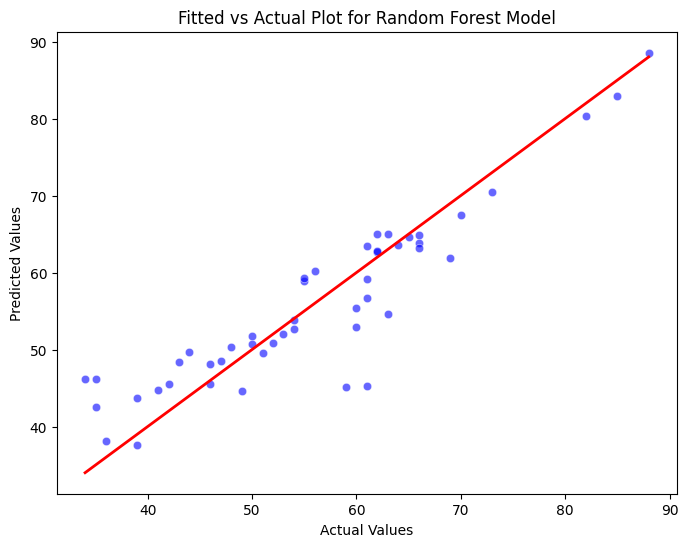

In [20]:
# Plotting the Fitted vs actual Plots
y_pred_rf = RF_model.predict(x_test)
# Create a scatter plot for fitted vs actual values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_rf, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)  # Line for perfect predictions

# Label the plot
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Fitted vs Actual Plot for Random Forest Model")
plt.show()

#In this we are training and evaluating a Gradient Boosting model for regression tasks

**Model Initialization and Training:**

The GB_model is initialized with GradientBoostingRegressor(random_state=42) and trained using the training dataset with GB_model.fit(x_train, y_train). Gradient Boosting is an ensemble technique that builds models sequentially to improve predictive performance.

**Prediction:**

Predictions are generated for the test set using y_pred_gb = GB_model.predict(x_test).

**Model Evaluation:**

**Root Mean Squared Error (RMSE):**

The RMSE is approximately 4.62, suggesting that the model's predictions deviate from the actual values by about 4.62 units on average. This indicates a strong fit, with lower RMSE values generally reflecting better model performance.


**R-squared (R²) Score:**

The R² value is approximately 0.87, which means that around 87% of the variance in the target variable is explained by the independent variables in the model. This high R² indicates that the Gradient Boosting model captures the underlying relationships in the data effectively.

In [22]:
# Create and train the Gradient Boosting model
GB_model = GradientBoostingRegressor(random_state=42)
GB_model.fit(x_train, y_train)

# Prediction
y_pred_gb = GB_model.predict(x_test)

# Model Evaluation
print('RMSE value for Gradient Boosting Model:', mean_squared_error(y_test, y_pred_gb, squared=False))
print('R-squared value for Gradient Boosting Model:', r2_score(y_test, y_pred_gb))

RMSE value for Gradient Boosting Model: 4.615051294967128
R-squared value for Gradient Boosting Model: 0.8653131767572602


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


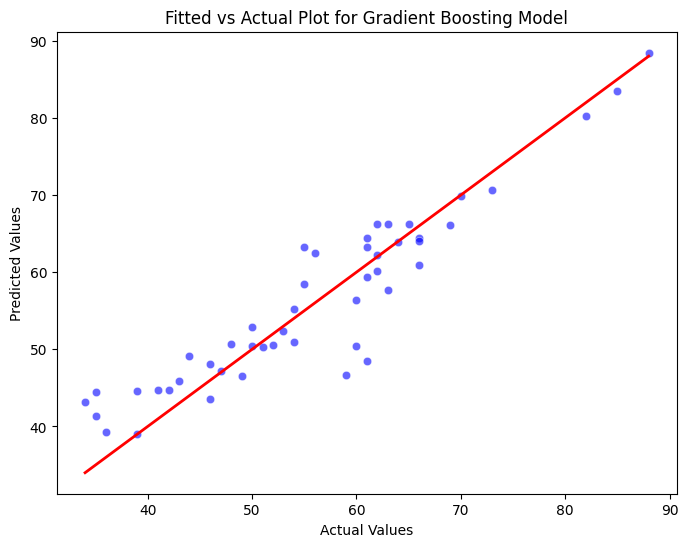

In [23]:
#Plotting the Fitted vs actual Plots
y_pred_gb = GB_model.predict(x_test)
# Create a scatter plot for fitted vs actual values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_gb, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)  # Line for perfect predictions

# Label the plot
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Fitted vs Actual Plot for Gradient Boosting Model")
plt.show()

#K-Fold Cross-Validation:

A K-Fold cross-validation strategy is employed to assess the model's robustness and generalizability. The dataset is split into 5 subsets, and the model is trained and evaluated on each subset to obtain RMSE and R² scores.

**RMSE Scores: The cross-validated RMSE scores are:**

[4.61, 4.04, 4.10, 3.54, 2.70]

The mean RMSE across all folds is approximately **3.80**, indicating improved predictive accuracy compared to the initial evaluation. The reduction in RMSE values across the folds suggests that the model is stable and performs consistently.

**R² Scores: The cross-validated R² scores are:**

[0.87, 0.89, 0.91, 0.93, 0.95]

The mean R² across all folds is approximately **0.91**, indicating that the model can explain about 91% of the variance in the target variable on average across the different subsets. This high mean R² reflects the model's strong ability to generalize to unseen data.

**An Important thing to notice after applying Kfold cross-validation on the model.**

After K-Fold cross-validation, the Gradient Boosting model shows improved predictive performance with a mean RMSE of approximately 3.80, indicating lower average prediction error compared to the initial RMSE of 4.62. Additionally, the mean R² score of about 0.91 demonstrates a stronger ability to explain variance in the target variable, up from 0.87. These improvements suggest that the model is more robust and generalizes better to unseen data.

In [29]:
# Let's apply Kfold cross validation for Gradient Boosting

# Initialize the Gradient Boosting model
grdboost_model = GradientBoostingRegressor(random_state=42)

# Set up K-Fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Calculate RMSE scores
rmse_scores = cross_val_score(grdboost_model, x, y, scoring='neg_root_mean_squared_error', cv=kf)
rmse_scores = -rmse_scores  # Negate to get positive RMSE values
print("RMSE scores:", rmse_scores)
print("Mean RMSE:", rmse_scores.mean())

# Calculate R² scores
r2_scores = cross_val_score(grdboost_model, x, y, scoring='r2', cv=kf)
print("R² scores:", r2_scores)
print("Mean R²:", r2_scores.mean())


RMSE scores: [4.60926441 4.04056009 4.10194388 3.54237147 2.70027527]
Mean RMSE: 3.798883021977236
R² scores: [0.8741921  0.89012623 0.90754765 0.92653576 0.94618594]
Mean R²: 0.908917534191166


#Conclusion:

**Linear Regression Model:**

(RMSE: 68.36) and  (R^2: 0.56)

**Random Forest Model:**
(RMSE: 5.08 ) and (R^2: 0.83)

**Gradient Boosting Model:**
(RMSE: 3.79) and (R^2: 0.90)

**This indicates that the Gradient Boosting Model is the best model among the Three model while predicting the House Prices of chicago city more accurately.**